In [1]:
# In this notebook, we explore the Taiwan Credit Default dataset data.
# The intention is to use Gender as the Protected Variable.

In [2]:
# Import Data handling/display libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import the Taiwan Credit Card Default training dataset
Taiwan_df = pd.read_csv('./input/Taiwan-Credit-Card-New.csv')

In [4]:
# Rename a couple of columns for aesthetics
Taiwan_df.rename(columns={'SEX':'GENDER', 'PAY_0': 'PAY_1',
                          'default payment next month':'DEFAULT'}, 
                          inplace=True)
# Drop ID as it has no impact on this study.
Taiwan_df.drop(["ID"], axis=1, inplace=True)

In [5]:
# How many (rows, columns)
Taiwan_df.shape

(30000, 24)

In [6]:
# Taiwan_df[['GENDER','EDUCATION', 'MARRIAGE', 'AGE']].describe()

In [7]:
Taiwan_df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [8]:
# Unique values of PAY_x
print('Repayment Status: PAY_1 (Sep2005), PAY_2 (Aug2005), PAY_3 (Jul2005)')
print('                  PAY_4 (Jun2005), PAY_5 (May2005), Pay_6 (Apr2005)')
print('-2,0=unknown, -1=pay duly, 1=payment delay by for one month') 
print('2=payment delay for two months, ... 8=payment delay for eight months')
print('PAY_1 Unique values', Taiwan_df.PAY_1.unique())
print('PAY_2 Unique values', Taiwan_df.PAY_2.unique())
print('PAY_3 Unique values', Taiwan_df.PAY_3.unique())
print('PAY_4 Unique values', Taiwan_df.PAY_4.unique())
print('PAY_5 Unique values', Taiwan_df.PAY_5.unique())
print('PAY_6 Unique values', Taiwan_df.PAY_6.unique())

Repayment Status: PAY_1 (Sep2005), PAY_2 (Aug2005), PAY_3 (Jul2005)
                  PAY_4 (Jun2005), PAY_5 (May2005), Pay_6 (Apr2005)
-2,0=unknown, -1=pay duly, 1=payment delay by for one month
2=payment delay for two months, ... 8=payment delay for eight months
PAY_1 Unique values [ 2 -1  0 -2  1  3  4  8  7  5  6]
PAY_2 Unique values [ 2  0 -1 -2  3  5  7  4  1  6  8]
PAY_3 Unique values [-1  0  2 -2  3  4  6  7  1  5  8]
PAY_4 Unique values [-1  0 -2  2  3  4  5  7  6  1  8]
PAY_5 Unique values [-2  0 -1  2  3  5  4  7  8  6]
PAY_6 Unique values [-2  2  0 -1  3  6  4  7  8  5]


In [9]:
# BILL_AMTx description
print('Amount Outstanding: BILL_AMT1 (Sep2005), BILL_AMT2 (Aug2005), BILL_AMT3 (Jul2005)')
print('                    BILL_AMT4 (Jun2005), BILL_AMT5 (May2005), BILL_AMT6 (Apr2005)')
Taiwan_df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

Amount Outstanding: BILL_AMT1 (Sep2005), BILL_AMT2 (Aug2005), BILL_AMT3 (Jul2005)
                    BILL_AMT4 (Jun2005), BILL_AMT5 (May2005), BILL_AMT6 (Apr2005)


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [10]:
# PAY_AMTx description
print('Amount Paid: PAY_AMT1 (Sep2005), PAY_AMT2 (Aug2005), PAY_AMT3 (Jul2005)')
print('                    PAY_AMT4 (Jun2005), PAY_AMT5 (May2005), PAY_AMT6 (Apr2005)')
Taiwan_df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

Amount Paid: PAY_AMT1 (Sep2005), PAY_AMT2 (Aug2005), PAY_AMT3 (Jul2005)
                    PAY_AMT4 (Jun2005), PAY_AMT5 (May2005), PAY_AMT6 (Apr2005)


,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


AxesSubplot(0.125,0.125;0.775x0.755)


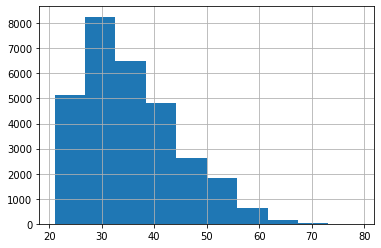

In [11]:
# What is the age distribution
print(Taiwan_df.AGE.hist())

In [12]:
# How many people are married etc. (1 = married; 2 = single; 3,0 = others)
Taiwan_df.loc[Taiwan_df.MARRIAGE == 0, 'MARRIAGE'] = 3
print('Most of the individuals in the dataset ate single, followed by married')
Taiwan_df['MARRIAGE'].value_counts()

Most of the individuals in the dataset ate single, followed by married


2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

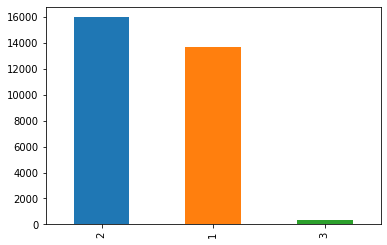

In [13]:
# Plot distribution of Marriage (1 = married; 2 = single; 3,0 = others)
Taiwan_df.MARRIAGE.value_counts().plot(kind = 'bar')

In [14]:
# Educational distribution (1=grad school; 2=university; 3=high school; 0,4, 5, 6=others)
Taiwan_df.EDUCATION.value_counts() 

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [15]:
# Count how many men(1) & women (2)
Taiwan_df.GENDER.value_counts()

2    18112
1    11888
Name: GENDER, dtype: int64

In [16]:
### get into the meat of whats what
#gender = Taiwan_df.groupby(['GENDER', 'DEFAULT']).size().unstack(1)
gender = Taiwan_df.groupby(['GENDER', 'DEFAULT']).size()
gender

GENDER  DEFAULT
1       0           9015
        1           2873
2       0          14349
        1           3763
dtype: int64

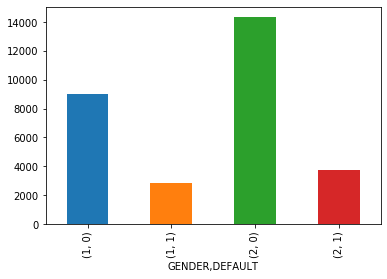

In [17]:
# Plot chart of number of women who've defaulted etc.
gender.plot(kind='bar', stacked = True)

In [18]:
# Calculate the percentages of male / females who have defaulted
PercentDefaults = MalePercentDefaults = FemalePercentDefaults = 0
TotalRows            = len(Taiwan_df)
TotalDefaults        = len(Taiwan_df[Taiwan_df["DEFAULT"]==1])
TotalNonDefaults     = len(Taiwan_df[Taiwan_df["DEFAULT"]==0])
MaleDefaults         = len(Taiwan_df[(Taiwan_df["DEFAULT"]==1) & (Taiwan_df["GENDER"]==1)])
FemaleDefaults       = len(Taiwan_df[(Taiwan_df["DEFAULT"]==1) & (Taiwan_df["GENDER"]==2)])
PercentDefaults      = (100*TotalDefaults) / TotalRows
MalePercentDefaults  = (100*MaleDefaults) / TotalDefaults
FemalePercentDefaults= (100*FemaleDefaults) / TotalDefaults

print('Total number of examples     : ', TotalRows)
print('Number of Defaults           : ', TotalDefaults) 
print('Number of NonDefaults        : ', TotalNonDefaults) 
print('Number of Male defaults      : ', MaleDefaults)
print('Number of Female defaults    : ', FemaleDefaults)
print('Percentage of Defaults       : ', PercentDefaults,'%')
print('Defaults - Male percentage   : ', MalePercentDefaults,'%')
print('Defaults - Female percentage : ', FemalePercentDefaults,'%')
print('')
print('Checksum of all Marriage Percentages: ', MalePercentDefaults + FemalePercentDefaults)

Total number of examples     :  30000
Number of Defaults           :  6636
Number of NonDefaults        :  23364
Number of Male defaults      :  2873
Number of Female defaults    :  3763
Percentage of Defaults       :  22.12 %
Defaults - Male percentage   :  43.29415310427969 %
Defaults - Female percentage :  56.70584689572031 %

Checksum of all Marriage Percentages:  100.0


In [19]:
# Calculate the percentages of married / single male / females who have defaulted
MarriedMalePercent = MarriedMaleDefaultPercent = MarriedFemalePercent = MarriedFemaleDefaultPercent = 0 
MalesPercent = FemalesPercent = TotalMales = TotalFemales = Ratio_F_M = 0
TotalRows            = len(Taiwan_df)
TotalMales           = len(Taiwan_df[Taiwan_df["GENDER"]==1])
TotalFemales         = len(Taiwan_df[Taiwan_df["GENDER"]==2])
TotalMaleDefa        = len(Taiwan_df[(Taiwan_df["GENDER"]==1)  & (Taiwan_df["DEFAULT"]==0)])
TotalFemaleDefa      = len(Taiwan_df[(Taiwan_df["GENDER"]==2)  & (Taiwan_df["DEFAULT"]==0)])

TotalDefaults        = len(Taiwan_df[Taiwan_df["DEFAULT"]==1])

MarriedMales         = len(Taiwan_df[(Taiwan_df["GENDER"]==1)  & (Taiwan_df["MARRIAGE"]==1)])
MarriedFemales       = len(Taiwan_df[(Taiwan_df["GENDER"]==2)  & (Taiwan_df["MARRIAGE"]==1)])
MarriedMaleDefaults  = len(Taiwan_df[(Taiwan_df["DEFAULT"]==1) & (Taiwan_df["GENDER"]==1) & (Taiwan_df["MARRIAGE"]==1)])
MarriedFemaleDefaults= len(Taiwan_df[(Taiwan_df["DEFAULT"]==1) & (Taiwan_df["GENDER"]==2) & (Taiwan_df["MARRIAGE"]==1)])

SingleMales          = len(Taiwan_df[(Taiwan_df["GENDER"]==1)  & (Taiwan_df["MARRIAGE"]==2)])
SingleFemales        = len(Taiwan_df[(Taiwan_df["GENDER"]==2)  & (Taiwan_df["MARRIAGE"]==2)])
SingleMaleDefaults   = len(Taiwan_df[(Taiwan_df["DEFAULT"]==1) & (Taiwan_df["GENDER"]==1) & (Taiwan_df["MARRIAGE"]==2)])
SingleFemaleDefaults = len(Taiwan_df[(Taiwan_df["DEFAULT"]==1) & (Taiwan_df["GENDER"]==2) & (Taiwan_df["MARRIAGE"]==2)])

TotalMarrieds        = len(Taiwan_df[Taiwan_df["MARRIAGE"]==1])
TotalSingles         = len(Taiwan_df[Taiwan_df["MARRIAGE"]==2])
TotalMarriedsDefa    = len(Taiwan_df[(Taiwan_df["DEFAULT"]==1)  & (Taiwan_df["MARRIAGE"]==1)])
TotalSinglesDefa     = len(Taiwan_df[(Taiwan_df["DEFAULT"]==1)  & (Taiwan_df["MARRIAGE"]==2)])

OtherMarriage        = len(Taiwan_df[(Taiwan_df["MARRIAGE"]==3)])
OtherMarriageDefaults= len(Taiwan_df[(Taiwan_df["DEFAULT"]==1) & (Taiwan_df["MARRIAGE"]==3)])
OtherMarriagePercent = (100*OtherMarriage) / TotalRows
OtherMarriageDefaultP= (100*OtherMarriageDefaults) / TotalDefaults

MalesPercent                = (100*TotalMales)   / TotalRows
FemalesPercent              = (100*TotalFemales) / TotalRows

MarriedMalePercent          = (100*MarriedMales) / TotalRows
MarriedMaleDefaultPercent   = (100*MarriedMaleDefaults) / TotalDefaults
MarriedFemalePercent        = (100*MarriedFemales) / TotalRows
MarriedFemaleDefaultPercent = (100*MarriedFemaleDefaults) / TotalDefaults

SingleMalePercent           = (100*SingleMales) / TotalRows
SingleMaleDefaultPercent    = (100*SingleMaleDefaults) / TotalDefaults
SingleFemalePercent         = (100*SingleFemales) / TotalRows
SingleFemaleDefaultPercent  = (100*SingleFemaleDefaults) / TotalDefaults

TotalMales = TotalFemales   = Ratio_F_M = Ratio_Defa_F_M = 0
Ratio_Married_F_M = Ratio_Single_F_M = Ratio_Defa_Married_F_M = Ratio_Defa_Single_F_M = 0 
TotalMales                  = len(Taiwan_df[Taiwan_df["GENDER"]==1])
TotalFemales                = len(Taiwan_df[Taiwan_df["GENDER"]==2])
Ratio_Defa_F_M              = FemaleDefaults / MaleDefaults
Ratio_F_M                   = TotalFemales / TotalMales
Ratio_Married_F_M           = MarriedFemales / MarriedMales
Ratio_Single_F_M            = SingleFemales / SingleMales
Ratio_Defa_Married_F_M      = MarriedFemaleDefaults / MarriedMaleDefaults
Ratio_Defa_Single_F_M       = SingleFemaleDefaults  / SingleMaleDefaults


print('Total number of examples         : ', TotalRows)
print('Total number of Males            : ', TotalMales, ' ', MalesPercent,'%')
print('Total number of Females          : ', TotalFemales, ' ', FemalesPercent,'%')
print('Ratio of Females to Males        : ', Ratio_F_M)
print('Total number of Other            : ', OtherMarriage, '    ',OtherMarriagePercent, '%')
print('Number of Defaults               : ', TotalDefaults,'  ',PercentDefaults,'%') 
print('')
print('Percentage of Married Males      : ', MarriedMalePercent)
print('Percentage of Married Females    : ', MarriedFemalePercent)
print('Ratio of Married Females to Males: ', Ratio_Single_F_M)
print('')
print('Percentage of Single Males       : ', SingleMalePercent)
print('Percentage of Single Females     : ', SingleFemalePercent)
print('Ratio of Single  Females to Males: ', Ratio_Married_F_M)
print('Checksum of all Marriage Percentages : ', MarriedMalePercent + MarriedFemalePercent + SingleMalePercent + SingleFemalePercent + OtherMarriagePercent)
print('')
print('Number of Married Male defaults  : ', MarriedMaleDefaults)
print('Number of Married Female defaults: ', MarriedFemaleDefaults)
print('Ratio of Married+Defaulted Females to Males : ',Ratio_Defa_Married_F_M)
print(' ')
print('Number of Single Male defaults   : ', SingleMaleDefaults)
print('Number of Single Female defaults : ', SingleFemaleDefaults)
print('Ratio of Single +Defaulted Females to Males : ',Ratio_Defa_Single_F_M)
print(' ')
print('Number of Other Married defaults : ', OtherMarriageDefaults)
print('Checksum of all Marriage defaults: ', MarriedMaleDefaults + MarriedFemaleDefaults + SingleMaleDefaults + SingleFemaleDefaults + OtherMarriageDefaults)
print('')
print('Percentage Default Married Males : ', MarriedMaleDefaultPercent)
print('Percentage Default Married Females:', MarriedFemaleDefaultPercent)
print('Percentage Default Single Males  : ', SingleMaleDefaultPercent)
print('Percentage Default Single Females: ', SingleFemaleDefaultPercent)
print('Percentage Default Other Marriage: ', OtherMarriageDefaultP)
print('Checksum of all Default Percentages:', MarriedMaleDefaultPercent + MarriedFemaleDefaultPercent + SingleMaleDefaultPercent + SingleFemaleDefaultPercent + OtherMarriageDefaultP)
print('')
print('Number of Male defaults ', TotalMaleDefa )
print('Number of Female defaults ', TotalFemaleDefa)
print('percentage of Male defaults :',((100*TotalMaleDefa)/(TotalMaleDefa+TotalFemaleDefa)))
print('')
print('Number of Singles defaults ', TotalSinglesDefa )
print('Number of Married defaults ', TotalMarriedsDefa)
print('percentage of single defaults :',((100*TotalSinglesDefa)/(TotalSinglesDefa+TotalMarriedsDefa)))

Total number of examples         :  30000
Total number of Males            :  11888   39.626666666666665 %
Total number of Females          :  18112   60.373333333333335 %
Ratio of Females to Males        :  1.5235531628532974
Total number of Other            :  377      1.2566666666666666 %
Number of Defaults               :  6636    22.12 %

Percentage of Married Males      :  17.3
Percentage of Married Females    :  28.23
Ratio of Married Females to Males:  1.4361361208606744

Percentage of Single Males       :  21.843333333333334
Percentage of Single Females     :  31.37
Ratio of Single  Females to Males:  1.631791907514451
Checksum of all Marriage Percentages :  100.0

Number of Married Male defaults  :  1346
Number of Married Female defaults:  1860
Ratio of Married+Defaulted Females to Males :  1.3818722139673105
 
Number of Single Male defaults   :  1485
Number of Single Female defaults :  1856
Ratio of Single +Defaulted Females to Males :  1.2498316498316497
 
Number of Other M

In [20]:
#Ratios 
TotalMales = TotalFemales = Ratio_F_M = Ratio_Defa_F_M = Ratio_Singles_Marrieds = 0
Ratio_Married_F_M = Ratio_Single_F_M = Ratio_Defa_Married_F_M = Ratio_Defa_Single_F_M = 0 
Ratio_defa_sings_married= 0
TotalMales             = len(Taiwan_df[Taiwan_df["GENDER"]==1])
TotalFemales           = len(Taiwan_df[Taiwan_df["GENDER"]==2])
Ratio_F_M              = TotalFemales / TotalMales
Ratio_Defa_F_M         = FemaleDefaults / MaleDefaults
Ratio_Married_F_M      = MarriedFemales / MarriedMales
Ratio_Single_F_M       = SingleFemales / SingleMales
Ratio_Defa_Married_F_M = MarriedFemaleDefaults / MarriedMaleDefaults
Ratio_Defa_Single_F_M  = SingleFemaleDefaults  / SingleMaleDefaults
Ratio_Singles_Marrieds = TotalSingles / TotalMarrieds
Ratio_defa_Singles_Marrieds= TotalSinglesDefa / TotalMarriedsDefa


print("Ratio of Females to Males                   := %f" % Ratio_F_M)
print("Ratio of Defaulted Females to Males         := %f" % Ratio_Defa_F_M)
print("Ratio of singles to marrieds                := %f" % Ratio_Singles_Marrieds)
print("Ratio of defaulted singles to marrieds      := %f" % Ratio_defa_Singles_Marrieds)
print('')
print("Ratio of Married Females to Males           := %f" % Ratio_Single_F_M)
print("Ratio of Single  Females to Males           := %f" % Ratio_Married_F_M)
print("Ratio of Married+Defaulted Females to Males := %f" % Ratio_Defa_Married_F_M)
print("Ratio of Single +Defaulted Females to Males := %f" % Ratio_Defa_Single_F_M)

Ratio of Females to Males                   := 1.523553
Ratio of Defaulted Females to Males         := 1.309781
Ratio of singles to marrieds                := 1.168753
Ratio of defaulted singles to marrieds      := 1.042109

Ratio of Married Females to Males           := 1.436136
Ratio of Single  Females to Males           := 1.631792
Ratio of Married+Defaulted Females to Males := 1.381872
Ratio of Single +Defaulted Females to Males := 1.249832


In [21]:
# Use this to get the average of all columns for each value of DEFAULT
Taiwan_df.groupby('DEFAULT').mean()


,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
DEFAULT,,,,,,,,,,,,,,,,,,,,,
0,178099.726074,1.614150,1.841337,1.564929,35.417266,-0.211222,-0.301917,-0.316256,-0.355633,-0.389488,...,47533.365605,43611.165254,40530.445343,39042.268704,6307.337357,6640.465074,5753.496833,5300.529319,5248.220296,5719.371769
1,130109.656420,1.567058,1.894665,1.530289,35.725738,0.668174,0.458258,0.362116,0.254521,0.167872,...,45181.598855,42036.950573,39540.190476,38271.435503,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068


In [22]:
## display(Markdown("#### Training Dataset shape"))
## print(dataset_orig_train.features.shape)
#Taiwan_df.info()